<a href="https://colab.research.google.com/github/sankarsh777/GDSC-AIML-SANKARSH-B241162ME/blob/main/intermediate_question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from PIL import Image


In [4]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train / 255.0#normalization
X_test = X_test / 255.0

X_train = X_train[..., np.newaxis]#reshaping didnt work without it
X_test = X_test[..., np.newaxis]

y_train = to_categorical(y_train, 10)#one hot encoding
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),#this layer learns things
    MaxPooling2D((2,2)),#this layer keeps strongest feature

    Conv2D(64, (3,3), activation="relu"),#repeat for grouping higher features
    MaxPooling2D((2,2)),

    Flatten(),#make it one vector
    Dense(128, activation="relu"),#provides activations for classifiyn
    Dense(10, activation="softmax")#actual classifications as probabilities
])
#7 layer model without counting input

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [7]:
model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)



Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 51s 116ms/step - accuracy: 0.8524 - loss: 0.5032 - val_accuracy: 0.9813 - val_loss: 0.0622
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.9792 - loss: 0.0694 - val_accuracy: 0.9862 - val_loss: 0.0496
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.9861 - loss: 0.0445 - val_accuracy: 0.9885 - val_loss: 0.0369
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.9902 - loss: 0.0321 - val_accuracy: 0.9902 - val_loss: 0.0369
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.9929 - loss: 0.0236 - val_accuracy: 0.9897 - val_loss: 0.0350


In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9870 - loss: 0.0355
Test accuracy: 0.9898999929428101


In [9]:

def load_external_image(path):#final task of question
    img = Image.open(path).convert("L")
    img = img.resize((28,28))
    img = np.array(img)

    img = 255 - img        # invert cos the input colours are opposite to training causes huge errors
    img = img / 255.0      # normalize
    img = img.reshape(1,28,28,1)

    return img


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted digit: 1


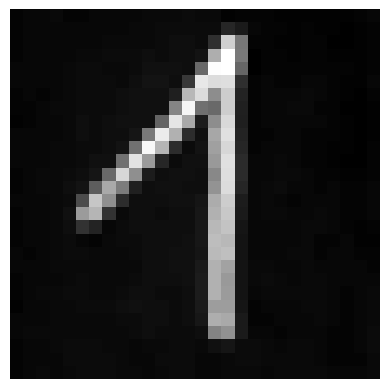

In [11]:
img = load_external_image("/content/final.jpg")

prediction = model.predict(img)
digit = np.argmax(prediction)

print("Predicted digit:", digit)

plt.imshow(img[0,:,:,0], cmap="gray")
plt.axis("off")
plt.show()
